In [1]:
%matplotlib inline 
%load_ext autoreload
%autoreload 2

import h5py
import sys
import getopt
import os
import random

from all_utils import *

import matplotlib.pyplot as plt 
from distinct_colours import get_distinct#,cm_linear,cm_plusmin

from readsnap import readsnap

import time

/software/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
NSNe=1000
np.random.seed(516)

## set-up some random positions
xs,ys,zs = ((np.random.rand(3,NSNe)-0.5)*15).astype('f')


## fixed linking length of .1, for now
linkingLengths = np.ones(NSNe,dtype='f')*50.0/NSNe*10*2

## launch times, fixed at 1 for now
launchTimes = np.ones(NSNe,dtype='f')

## cooling times 
coolingTimes = np.ones(NSNe,dtype='f')

## ids, just integers now 
ids = np.arange(NSNe,dtype='f')


In [4]:
from FoF_utils import findFoFClustering
xss,yss,zss,idss,ltss,ctss,llss,numNGBs,clusterIDs=findFoFClustering(xs,ys,zs,ids,launchTimes,coolingTimes,linkingLengths)
print



Executing c code
582 many clusters found
0.0106208324432 s elapsed



2.3487703800201416 3.7554187774658203 1.0
1.559938907623291 3.371246337890625 1.0
1.965631127357483 2.7042059898376465 1.0
1.5656168460845947 2.909963846206665 1.0
1.417643666267395 3.076301336288452 1.0
1.1138355731964111 4.232407093048096 1.0
[0.         0.96465073 1.7564544  1.51311261 1.69091125 2.08405932]
[0.96465073 0.         0.68188445 0.2129407  0.13312531 0.95866164]
[1.7564544  0.68188445 0.         0.280891   0.45043126 3.07907642]
[1.51311261 0.2129407  0.280891   0.         0.0792011  1.97417266]
[1.69091125 0.13312531 0.45043126 0.0792011  0.         1.429583  ]
[2.08405932 0.95866164 3.07907642 1.97417266 1.429583   0.        ]
done



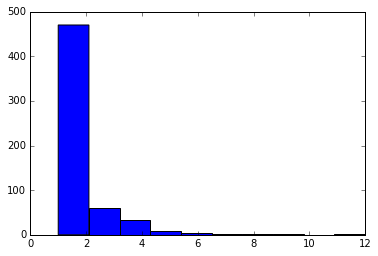

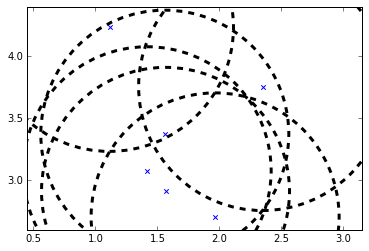

In [9]:
plt.hist(numNGBs)
index = list(np.logical_and(numNGBs>5,numNGBs<10)).index(1)

my_coords = np.array([xss[index],yss[index],zss[index]]).T


plt.figure()
plt.scatter(my_coords[:,0],my_coords[:,1],marker='x')
for (x,y,r) in zip(my_coords[:,0],my_coords[:,1],llss[index]):
    print x,y,r
    plt.gca().add_artist(plt.Circle((x,y),r,ls='--',lw=3,fill=None))
plt.axes().set_aspect('equal', 'datalim')


for coord in my_coords:
    dist = np.sum((my_coords-coord)**2,axis=1)/llss[index]**2
    print dist
print 'done'
print